In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

In [77]:
data = pd.read_csv("train.csv",engine='python')
data

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,...,NaN,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,...,NaN,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,...,0.0,19.0,NaN,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,...,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0


In [78]:
data.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [79]:
data.Age = data.Age.fillna(data.Age.median())
data["Annual Income"] = data["Annual Income"].fillna(data["Annual Income"].median())
data["Marital Status"] = data["Marital Status"].fillna(data["Marital Status"].mode())
data["Number of Dependents"] = data["Number of Dependents"].fillna(data["Number of Dependents"].median())
data.Occupation = data.Occupation.fillna(data.Occupation.mode())
data["Health Score"]  = data["Health Score"].fillna(data["Health Score"].mean())
data["Previous Claims"] = data["Previous Claims"].fillna(data["Previous Claims"].median())
data["Credit Score"]  = data["Credit Score"].fillna(data["Credit Score"].mean())
data["Customer Feedback"] = data["Customer Feedback"].fillna(data["Customer Feedback"].mode())


In [80]:
data = data.dropna()

In [81]:
data

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.00000,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,592.92435,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.00000,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,...,1.0,11.0,398.00000,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo,111.0
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,...,1.0,9.0,635.00000,3.0,2020-08-02 15:21:39.144722,Poor,No,Daily,Condo,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199991,1199991,59.0,Female,23706.0,Divorced,4.0,High School,Self-Employed,24.913204,Suburban,...,1.0,17.0,592.92435,1.0,2021-06-22 15:21:39.188220,Good,Yes,Monthly,Apartment,3381.0
1199992,1199992,53.0,Female,6837.0,Married,2.0,High School,Self-Employed,17.844235,Urban,...,1.0,15.0,406.00000,4.0,2021-01-09 15:21:39.281787,Good,No,Rarely,House,1251.0
1199994,1199994,34.0,Male,23456.0,Single,4.0,Master's,Self-Employed,14.783439,Rural,...,1.0,12.0,548.00000,9.0,2023-06-09 15:21:39.134960,Good,No,Monthly,Apartment,1584.0
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,...,1.0,5.0,372.00000,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0


In [82]:
cat = data.select_dtypes('object').columns.to_list()
cat.remove('Policy Start Date')

In [83]:
cat

['Gender',
 'Marital Status',
 'Education Level',
 'Occupation',
 'Location',
 'Policy Type',
 'Customer Feedback',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type']

(array([74156., 78531., 78158., 80168., 77373., 80171., 78042., 78065.,
        75575., 75029.]),
 array([18125.64003565, 18308.14003589, 18490.64003613, 18673.14003637,
        18855.64003661, 19038.14003685, 19220.64003709, 19403.14003733,
        19585.64003757, 19768.14003781, 19950.64003805]),
 <BarContainer object of 10 artists>)

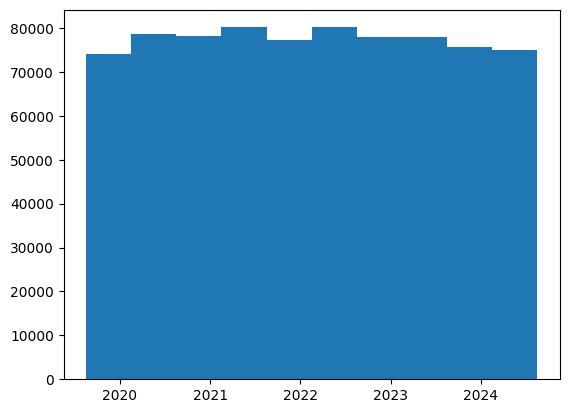

In [84]:
plt.hist(pd.to_datetime(data["Policy Start Date"]))

In [85]:
df = data
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])

# Extract year
df['year'] = df['Policy Start Date'].dt.year

# One-Hot Encoding for years 2020 to 2025
one_hot = pd.get_dummies(df['year'], prefix='year')

# Combine DataFrames
df = pd.concat([df, one_hot], axis=1)

C:\Users\Александр\AppData\Local\Temp\ipykernel_14852\4254799640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
C:\Users\Александр\AppData\Local\Temp\ipykernel_14852\4254799640.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['Policy Start Date'].dt.year


In [86]:
df


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Exercise Frequency,Property Type,Premium Amount,year,year_2019,year_2020,year_2021,year_2022,year_2023,year_2024
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,Weekly,House,2869.0,2023,False,False,False,False,True,False
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,Weekly,House,567.0,2023,False,False,False,False,True,False
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,Weekly,House,2022.0,2021,False,False,True,False,False,False
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,...,Rarely,Condo,111.0,2022,False,False,False,True,False,False
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,...,Daily,Condo,64.0,2020,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199991,1199991,59.0,Female,23706.0,Divorced,4.0,High School,Self-Employed,24.913204,Suburban,...,Monthly,Apartment,3381.0,2021,False,False,True,False,False,False
1199992,1199992,53.0,Female,6837.0,Married,2.0,High School,Self-Employed,17.844235,Urban,...,Rarely,House,1251.0,2021,False,False,True,False,False,False
1199994,1199994,34.0,Male,23456.0,Single,4.0,Master's,Self-Employed,14.783439,Rural,...,Monthly,Apartment,1584.0,2023,False,False,False,False,True,False
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,...,Daily,Apartment,1303.0,2023,False,False,False,False,True,False


In [87]:
data = pd.concat([data.drop(cat, axis=1), pd.get_dummies(data[cat]), one_hot], axis=1)

In [88]:
data = data.drop('Policy Start Date', axis =1)
data

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,...,Exercise Frequency_Weekly,Property Type_Apartment,Property Type_Condo,Property Type_House,year_2019,year_2020,year_2021,year_2022,year_2023,year_2024
0,0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.00000,5.0,2869.0,...,True,False,False,True,False,False,False,False,True,False
2,2,23.0,25602.0,3.0,47.177549,1.0,14.0,592.92435,3.0,567.0,...,True,False,False,True,False,False,False,False,True,False
4,4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.00000,4.0,2022.0,...,True,False,False,True,False,False,True,False,False,False
7,7,48.0,127237.0,2.0,5.769783,1.0,11.0,398.00000,5.0,111.0,...,False,False,True,False,False,False,False,True,False,False
9,9,44.0,52447.0,2.0,20.473718,1.0,9.0,635.00000,3.0,64.0,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199991,1199991,59.0,23706.0,4.0,24.913204,1.0,17.0,592.92435,1.0,3381.0,...,False,True,False,False,False,False,True,False,False,False
1199992,1199992,53.0,6837.0,2.0,17.844235,1.0,15.0,406.00000,4.0,1251.0,...,False,False,False,True,False,False,True,False,False,False
1199994,1199994,34.0,23456.0,4.0,14.783439,1.0,12.0,548.00000,9.0,1584.0,...,False,True,False,False,False,False,False,False,True,False
1199995,1199995,36.0,27316.0,0.0,13.772907,1.0,5.0,372.00000,3.0,1303.0,...,False,True,False,False,False,False,False,False,True,False


In [89]:
Y = data["Premium Amount"]
X = data.drop('Premium Amount', axis = 1)

In [90]:
X = MinMaxScaler().fit_transform(X)

In [91]:
y_min = MinMaxScaler().fit(Y.to_numpy().reshape(-1,1))

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [94]:
y_train = y_min.transform(y_train.to_numpy().reshape(-1,1))


In [102]:
y_test = y_min.transform(y_test.to_numpy().reshape(-1,1))

In [17]:
cb = CatBoostRegressor(iterations=1000, learning_rate=0.01, depth=6)

In [18]:
cb.fit(X_train, y_train)

0:	learn: 864.6406330	total: 226ms	remaining: 3m 45s
1:	learn: 864.3429357	total: 303ms	remaining: 2m 31s
2:	learn: 864.0410346	total: 380ms	remaining: 2m 6s
3:	learn: 863.7550860	total: 464ms	remaining: 1m 55s
4:	learn: 863.4809079	total: 544ms	remaining: 1m 48s
5:	learn: 863.2063083	total: 630ms	remaining: 1m 44s
6:	learn: 862.9315574	total: 716ms	remaining: 1m 41s
7:	learn: 862.6636895	total: 789ms	remaining: 1m 37s
8:	learn: 862.3983165	total: 863ms	remaining: 1m 35s
9:	learn: 862.1343453	total: 940ms	remaining: 1m 33s
10:	learn: 861.8779738	total: 1.02s	remaining: 1m 31s
11:	learn: 861.6350142	total: 1.09s	remaining: 1m 29s
12:	learn: 861.3881259	total: 1.17s	remaining: 1m 28s
13:	learn: 861.1594537	total: 1.25s	remaining: 1m 27s
14:	learn: 860.9205457	total: 1.32s	remaining: 1m 26s
15:	learn: 860.6848872	total: 1.39s	remaining: 1m 25s
16:	learn: 860.4605402	total: 1.46s	remaining: 1m 24s
17:	learn: 860.2406082	total: 1.53s	remaining: 1m 23s
18:	learn: 860.0293401	total: 1.6s	rema

KeyboardInterrupt: 

In [99]:
import numpy as np
from sklearn.metrics import mean_squared_error


In [ ]:
mean_squared_error(y_min.inverse_transform(y_test), y_min.inverse_transform(model.predict(X_test)))

In [108]:
def rmlse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Logarithmic Error (RMLSE).
    
    Parameters:
    y_true (array-like): Actual values
    y_pred (array-like): Predicted values
    
    Returns:
    float: RMLSE value
    """
    # Convert inputs to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate RMLSE
    rmlse_value = np.sqrt(np.mean((np.log1p(y_true) - np.log1p(y_pred)) ** 2))
    return rmlse_value

In [106]:
def rmlse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(tf.math.log(y_true + 1) - tf.math.log(y_pred + 1))))


In [110]:
rmlse(y_min.inverse_transform(y_test), y_min.inverse_transform(model.predict(X_test)))

4846/4846 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


1.1511688505447302

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset


In [22]:
X_train.shape

(620214, 46)

In [48]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)  # Input layer to hidden layer
        self.fc2 = nn.Linear(64, 32)   # Hidden layer to hidden layer
        self.fc3 = nn.Linear(32, 1)    # Hidden layer to output layer
        self.relu = nn.ReLU()          # Activation function

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x


In [49]:
model = SimpleNN()
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer


In [50]:
train_dataset = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train.to_numpy()))
train_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # Adjust batch_size as needed

In [51]:
from tqdm import tqdm


In [52]:
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in tqdm(train_loader):
        outputs = model(inputs.float())
        loss = criterion(outputs.float().flatten(), targets.float())

        optimizer.zero_grad()  # Zero the gradients
        loss.backward()        # Backpropagation
        optimizer.step()       # Update weights
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

100%|███████████████████████████████████████████████████████████████████████████| 19382/19382 [00:48<00:00, 396.85it/s]


Epoch [1/100], Loss: 387815.3750


  8%|█████▉                                                                      | 1528/19382 [00:03<00:45, 390.89it/s]


KeyboardInterrupt: 

In [ ]:
# Evaluate the Model using DataLoader
model.eval()  # Set the model to evaluation mode
test_loss = 0.0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

# Average test loss
test_loss /= len(test_loader)
print(f'Test Loss: {test_loss:.4f}')

In [95]:
import tensorflow as tf


In [96]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(46,)),  # Input layer to hidden layer
    tf.keras.layers.Dense(300, activation='relu'),                     # Hidden layer
    tf.keras.layers.Dense(1)                                          # Output layer
])

C:\Program Files\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [98]:
model.fit(X_train, y_train, epochs=2, batch_size=32, verbose=1)


Epoch 1/2
19382/19382 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 0.0309
Epoch 2/2
19382/19382 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 0.0299


In [71]:
X_train

array([[0.67405141, 0.76086957, 0.03682123, ..., 0.        , 1.        ,
        0.        ],
       [0.28584262, 0.5       , 0.06224207, ..., 0.        , 0.        ,
        0.        ],
       [0.3791571 , 0.26086957, 0.07320911, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.17013723, 0.73913043, 0.68497617, ..., 0.        , 0.        ,
        0.        ],
       [0.86571622, 0.32608696, 0.11378379, ..., 0.        , 0.        ,
        1.        ],
       [0.15727469, 0.56521739, 0.05261509, ..., 1.        , 0.        ,
        0.        ]])